# Кластеризация

In [1]:
# Обучение без учителя - это такие методы машинного обучения, с помощью которых решаются задачи
# с использованием данных, в которых отсутствует правильный ответ. В таких задачах нам не нужно 
# искать какую-то величину, а нужно изучить выборку объектов, обладающих определенными признаками
# и понять, как связаны между собой эти объекты или насколько эти объекты похожи. В задачах
# обучения с учителем нам никак не обойтись без размеченных данных (мы должны иметь данные с готовым ответом,
# чтобы натренировать на таких ответах модель и потом уже на новых данных предсказывать ответ), а в задачах
# обучения без учителя правильного ответа изначально нет. До этого мы предсказывали цены на недвижимость,
# решая задачу регрессии, то теперь мы разбираемся с признаками объектов недвижимости, находя определенные группы
# таких объектов, либо обнаруживая аномалии в данных. Одним из самых часто применяемых методов обучения
# без учителя является кластеризация. Она позволяет разбить группу на подгруппы или кластеры. Если объект попадает в 
# кластер, то он должен быть похожим на объекты из этого кластера. Затем можно связать обучение без учителя с учителем,
# так как если нам удалось разбить объекты на кластеры, то мы можем использовать информацию о принадлежности
# объекта к какому-либо классу в качестве одного из признаков данного объекта, а затем использовать этот признак 
# в обучении с учителем. Либо можно после разделения для каждого кластера создать отдельную модель обучения с учителем.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

#### Кластеризация k-means 

In [2]:
# k-means - один из алгоритмов вероятностного подхода

In [3]:
from sklearn.cluster import KMeans

In [4]:
model = KMeans(n_clusters=3, random_state=100)

In [5]:
# Сначала рандомно в пространстве признаков расставляются центроиды или центры кластеров (количетсво равно n_clusters)
# ближайщие к центроиде точки приписываются к кластеру, центром которой является данная центроида. Затем в кластерах
# высчитываются новые центры (центроиды перемещаются). Если точка стала ближе к другой центроиде, то она переходит
# к ней. Это происходит до тех пор, пока координаты центроид не перестанут существенно меняться.
# Так же как и в KNN расстояние между объектами в кластерном анализе определяется как расстояние между точками
# в пространстве признаков. При этом признаки сначала нужно привести к схожему масштабу иначе расстояние между точками 
# не будет в полной мере учитывать все признаки

Функция для создания учебного датасета (признаки рыб, обитающих в озере)

In [6]:
# make_data случайным образом создает набор данных. n - число объектов, которые мы хотим задать для каждой группы объектов
# всего будет 3 группы по 10 объектов. Итого набор данных, создаваемых функцией
# make_data будет в 3 раза больше, чем число n объектов. У кождого объекта будет 2 признака: x и y
def make_data(n, seed):
    np.random.seed(seed)
    shift_matrix = np.array([[3, 3],
                             [6, 9],
                             [9, 3]])
    data = np.random.randn(3, 2, n) + shift_matrix.reshape((3, 2, 1))
    data = np.swapaxes(data, 1, 2)
    data = data.reshape((-1, 2))
    data *= np.array([[20, 0.5]])
    df = pd.DataFrame({'x': data[:, 0], 'y': data[:, 1]},
                     columns=['x', 'y'])
    df = df.sample(frac=1.0)
    return df

In [7]:
# Будут получены 2 набора данных:

train = make_data(10, 42)
test = make_data(10, 27)

Text(0.5, 1.0, 'Train')

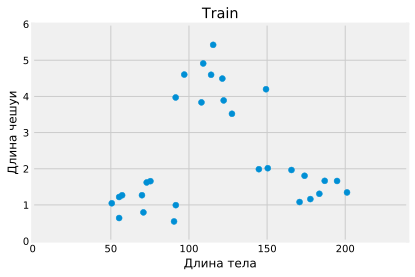

In [8]:
plt.scatter(train['x'], train['y'])
plt.xlim(0, 240)
plt.ylim(0, 6)
plt.xlabel('Длина тела')
plt.ylabel('Длина чешуи')
plt.title('Train')

##### Нормализация данных 

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()

In [11]:
train_scaled = scaler.fit_transform(train)
train_scaled = pd.DataFrame(train_scaled, columns=['x', 'y'])

Text(0.5, 1.0, 'Train')

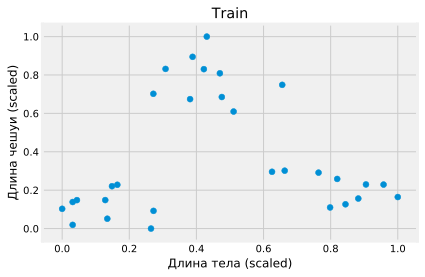

In [12]:
plt.scatter(train_scaled['x'], train_scaled['y'])
plt.xlabel('Длина тела (scaled)')
plt.ylabel('Длина чешуи (scaled)')
plt.title('Train')

Построение модели кластеризации

In [13]:
train_labels = model.fit_predict(train_scaled)

In [14]:
# Номера кластеров для каждого объекта

train_labels

array([2, 2, 1, 1, 1, 2, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 0,
       1, 1, 2, 2, 2, 0, 1, 1])

#### Центры кластеров 

In [15]:
# Координаты центров кластеров в нормализованном виде

model.cluster_centers_

array([[0.4314873 , 0.77857028],
       [0.12190576, 0.11495728],
       [0.82595794, 0.21634417]])

In [16]:
# Координаты центров кластеров в первоначальном масштабе

centers = scaler.inverse_transform(model.cluster_centers_)
centers

array([[115.56312871,   4.34494667],
       [ 68.96122223,   1.10467088],
       [174.94355655,   1.59972071]])

Text(0.5, 1.0, 'Train')

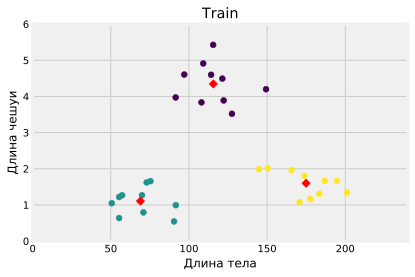

In [17]:
plt.scatter(train['x'], train['y'], c=train_labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')
plt.xlim(0, 240)
plt.ylim(0, 6)
plt.xlabel('Длина тела')
plt.ylabel('Длина чешуи')
plt.title('Train')

### Inertia 

In [18]:
# Величина, показывающая, насколько далеко в среднем расположены точки от центров своих кластеров
# (сумма квадратов расстояний от объектов до центров их кластеров).
# Чем она меньше, тем лучше разбиение на кластеры, но нужно соблюдать баланс между ее значением и 
# количеством кластеров.
# Равна нулю, если кластеров столько же, сколько и объектов

In [19]:
model.inertia_

0.5417377477488047

In [20]:
# Переберем количество кластеров от 2 до 10, чтобы увидеть как меняется inertia

inertia_arr = []
for i in range(2, 10):
    temp_model = KMeans(n_clusters=i, random_state=100)
    temp_model.fit(train_scaled)
    temp_inertia = temp_model.inertia_
    print(temp_inertia)
    inertia_arr.append(temp_inertia)

2.900264163209545
0.5417377477488047
0.428173689117485
0.32586599155679713
0.26736166193637667
0.20725794455977647
0.1677417222340906
0.14671272476076844


In [21]:
# Если кластеров столько, сколько объектов, то inertia = 0. Но нам важно, чтобы было разумное количество кластеров

Text(0.5, 1.0, 'Inertia')

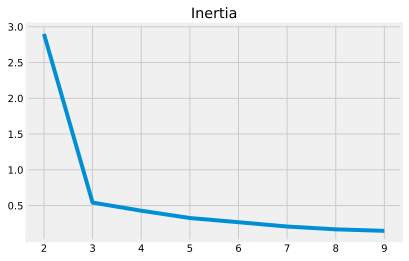

In [22]:
    plt.plot([i for i in range(2, 10)], inertia_arr)
    plt.title('Inertia')

In [23]:
# Количетво кластеров, равное 3 нам подходит

#### Отнесение примеров из тестового датасета к определенному кластеру 

In [24]:
# Нормализуем тестовый датасет
test_scaled = scaler.transform(test)
test_scaled = pd.DataFrame(test_scaled, columns=['x', 'y'])

In [25]:
# С помощью готовой модели сделаем предсказание
test_labels = model.predict(test_scaled)

In [26]:
test_labels

array([1, 2, 1, 2, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 2, 1, 0, 0, 2, 1,
       2, 2, 1, 0, 0, 1, 0, 2])

Text(0.5, 1.0, 'Train')

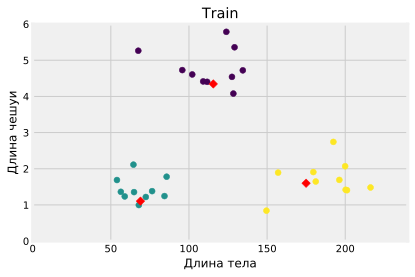

In [27]:
plt.scatter(test['x'], test['y'], c=test_labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')
plt.xlim(0, 240)
plt.ylim(0, 6)
plt.xlabel('Длина тела')
plt.ylabel('Длина чешуи')
plt.title('Train')

In [28]:
# По графику видно, что объекты тестового датасета вполне обосновано отнесены к 3-м кластерам, и центроиды, построеные на
# тренировочных данных, также подходят и к тестовым данным

#### AgglomerativeClustering 

In [29]:
# Агломеративные алгоритмы - алгоритмы иерархического подхода, основанные на объединении мелких кластеров в более
# крупные. Вначале каждый объект считается отдельным кластером. Другие алгоритмы иерархического подхода - дивизивные -
# используют обратный порядок, когда вся выборка считается одним кластером, и затем этот кластер делится на
# более мелкие

In [30]:
from sklearn.cluster import AgglomerativeClustering

In [31]:
model = AgglomerativeClustering(n_clusters = 3)

In [32]:
train_labels = model.fit_predict(train_scaled)

In [33]:
train_labels

array([0, 0, 1, 1, 1, 0, 2, 0, 2, 1, 1, 2, 2, 2, 2, 2, 0, 2, 0, 0, 1, 2,
       1, 1, 0, 0, 0, 2, 1, 1], dtype=int64)

Text(0.5, 1.0, 'Train')

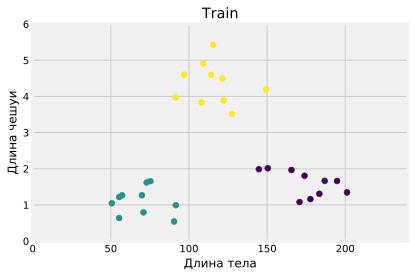

In [34]:
plt.scatter(train['x'], train['y'], c=train_labels)
plt.xlim(0, 240)
plt.ylim(0, 6)
plt.xlabel('Длина тела')
plt.ylabel('Длина чешуи')
plt.title('Train')

In [35]:
# Если мы хотим для новых данных (в нашем случае это тестовый датасет) предсказать, к каким кластерам они относятся,
# но при этом для данного класса в библиотеке sklearn нет метода predict, то мы можем воспользоваться KNeighborsClassifier

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn = KNeighborsClassifier(n_neighbors=5)

In [38]:
# Построим модель для тренировочного датасета, используя номер кластера в качестве класса

knn.fit(train_scaled, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [39]:
# Для объектов тестовых данных предскажем к какому кластеру какой объект относится

test_labels = knn.predict(test_scaled)

In [40]:
test_labels

array([1, 0, 1, 0, 2, 2, 2, 2, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 2, 2, 0, 1,
       0, 0, 1, 2, 2, 1, 2, 0], dtype=int64)

Text(0.5, 1.0, 'Train')

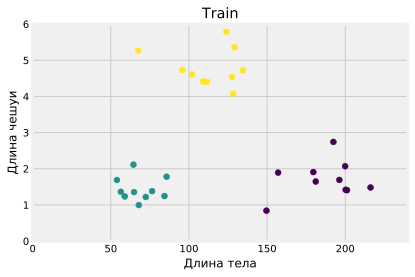

In [41]:
plt.scatter(test['x'], test['y'], c=test_labels)
plt.xlim(0, 240)
plt.ylim(0, 6)
plt.xlabel('Длина тела')
plt.ylabel('Длина чешуи')
plt.title('Train')

In [42]:
# Таким способом получено хорошее разбиение

# Понижение размерности данных

In [43]:
# У нас есть объект с наблюдениями (объектами), и мы пытаемся обучить модель (например дерево решений), чтобы
# научиться предсказывать какую-то целевую переменную. Но в данных есть проблема - слишком много признаков у объектов.
# Причем, убрать их мы не можем, так как пострадает точность модели. Может быть ситуация, когда много дамми-переменных
# которые созданы для категориальных признаков, состоящих из множества категорий, так что часто эти дамми-переменные
# содержат нули и лишь изредка единицы, т.е. мы имеем дело с разреженными данными. Плюс, может быть много признаков,
# которые коррелируют между собой, но которые мы не можем убрать из модели. Признаков может быть 1000 или 1000000.
# На таком количестве признаков модель построить практически невозможно, здесь на помощь придут методы понижения
# размерности. Они сжимают данные, компрессируют множество признаков в меньшее их количество. Один из них - PCA

### PCA 

Principal Component Analysis (Метод главных компонент)

In [44]:
# столбец 0 - количество комнат
# столбец 1 - площадь дома (в тысячах квадратных футов)

houses = np.array([[5, 1.6],
                   [4, 1.4],
                   [6, 1.9],
                   [3, 1.1],
                   [4, 1.25]])

Text(0, 0.5, 'Площадь дома')

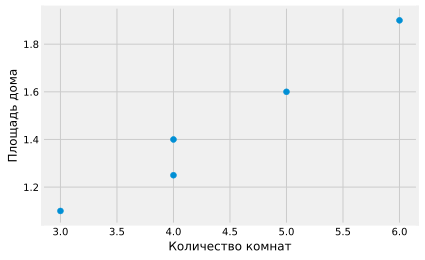

In [45]:
plt.scatter(houses[:, 0], houses[:, 1])
plt.xlabel('Количество комнат')
plt.ylabel('Площадь дома')

In [46]:
# По графику видно, что два графика сильно скоррелированы, и их можно разложить вдоль одной прямой,
# то есть фактически сжать данные до одного измерения.
# Это означает, что данные могут быть представлены одной главной компонентой с минимальной потерей информации

### Алгоритм РСА 

In [47]:
# Признаки немасштабированы, но они не отличаются более, чем в 10 раз, следовательно можно обойтись без масштабирования

houses

array([[5.  , 1.6 ],
       [4.  , 1.4 ],
       [6.  , 1.9 ],
       [3.  , 1.1 ],
       [4.  , 1.25]])

In [48]:
# Найдем среднее значение каждого признака

mean_values = np.mean(houses, axis=0)
mean_values

array([4.4 , 1.45])

In [49]:
# Отнимем от значений признаков средние значения

houses_centered = houses - mean_values
houses_centered

array([[ 0.6 ,  0.15],
       [-0.4 , -0.05],
       [ 1.6 ,  0.45],
       [-1.4 , -0.35],
       [-0.4 , -0.2 ]])

In [50]:
# Найдем матрицу ковариаций 
# Матрица ковариаций - матрица, состоящая из попарных ковариаций признаков
# Она состоит из попарных ковариаций признаков
# Это многомерный аналог дисперсии
# Транспонирование, т.к. в линейной алгебре векторы записываются в столбцы, а в pd и np в строки
# Так как у нас 2 признака, то матрица д.б. размером 2 на 2
# По главной диагонали расположены ковариации признаков, вычисленные для самих этих признаков. Эти значения должны
# равняться дисперсии признака 1.3 - дисперсия 0-го признака 0.0975 - дисперсия 1-го признака

covarience_matrix = np.cov(houses_centered.T)
covarience_matrix

array([[1.3   , 0.35  ],
       [0.35  , 0.0975]])

In [51]:
# Проверка правильности найденной матрицы - найдем дисперсии центрированных признаков,
# они должны совпадать по значению с главной диагональю ковариационной матрицы
# ddof=1 - несмещенная дисперсия

print(np.var(houses_centered[:, 0], ddof=1))
print(np.var(houses_centered[:, 1], ddof=1))

1.3
0.09749999999999998


In [52]:
# Найдем собственные значения (eigenvalues)
# и собственные векторы (eigenvectors) матрицы ковариаций

In [53]:
eigenvalues, eigenvectors = np.linalg.eig(covarience_matrix)

In [54]:
eigenvalues

array([1.39445221, 0.00304779])

In [55]:
eigenvectors

array([[ 0.96546225, -0.26054298],
       [ 0.26054298,  0.96546225]])

In [56]:
# Мы хотим найти одну главную компоненту, мы выберем один собственный вектор, которому соответствует максимальное
# собственное значение

In [57]:
# Собственные значения (eigenvalues) сильно отличаются -
# eigenvalues[0] намного больше eigenvalues[1],
# поэтому оставим только собственный вектор из столбца 0 массива eigenvectors,
# то есть eigenvectors[:, 0]
# Умножим центрированные данные на этот вектор

In [58]:
result_pre = np.dot(houses_centered, eigenvectors[:, 0])
result = result_pre.reshape(-1, 1)
result

array([[ 0.6183588 ],
       [-0.39921205],
       [ 1.66198394],
       [-1.44283719],
       [-0.4382935 ]])

In [59]:
# Таким образом мы получили одну главную компоненту

Сравнение с результатом вычислений в библиотеке sklearn

In [60]:
from sklearn.decomposition import PCA

In [61]:
# n_components=1, так как мы ищем одну компоненту

pca = PCA(n_components=1)

In [62]:
mc = pca.fit_transform(houses)
mc

array([[ 0.6183588 ],
       [-0.39921205],
       [ 1.66198394],
       [-1.44283719],
       [-0.4382935 ]])

In [63]:
# Мы можем посмотреть, какую долю объясненной дисперсии содержит эта компонента

pca.explained_variance_ratio_

array([0.99781911])

In [64]:
# Эта доля близка к 1. Мы потеряем менее 1 процента информации (потеря 10 процентов - не очень большая)

#### Применеие  PCA в моделях машинного обучения

Загрузим сохраненные данные по пассажирам Титаника

In [65]:
X_train = pd.read_pickle('X_train.pkl')
y_train = pd.read_pickle('y_train.pkl')

In [66]:
X_valid = pd.read_pickle('X_valid.pkl')
y_valid = pd.read_pickle('y_valid.pkl')

In [67]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 299 to 103
Data columns (total 11 columns):
Sex           668 non-null int32
Age           668 non-null float64
SibSp         668 non-null int64
Parch         668 non-null int64
Fare          668 non-null float64
Embarked_C    668 non-null uint8
Embarked_Q    668 non-null uint8
Embarked_S    668 non-null uint8
Pclass_1      668 non-null uint8
Pclass_2      668 non-null uint8
Pclass_3      668 non-null uint8
dtypes: float64(2), int32(1), int64(2), uint8(6)
memory usage: 32.6 KB


In [68]:
# Нужно отмасштабировать X_train, X_valid

from sklearn.preprocessing import StandardScaler
# Т.к. алгоритм PCA gпроизводит центрирование признаков (вычитает из значения признака среднее его значение), мы
# можем использовать класс StandardScaler для масштабирования признака без центрирования, чтобы не производить лишних 
# вычислений (with_mean = False)

In [69]:
scaler = StandardScaler(with_mean=False)

X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_valid_scaled = pd.DataFrame(X_valid_scaled, columns=X_train.columns)

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


Сначала мы не будем указывать число компонент (по умолчанию все компоненты будут сохранены, их будет столько, сколько признаков)

In [70]:
pca = PCA(random_state=100)

In [71]:
pca.fit(X_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
  svd_solver='auto', tol=0.0, whiten=False)

In [72]:
# Посмотрим на долю объясненной дисперсии каждой компоненты

pca.explained_variance_ratio_

array([2.22480052e-01, 1.80579178e-01, 1.61196472e-01, 1.18874068e-01,
       9.43088132e-02, 7.61203186e-02, 6.30288483e-02, 4.72728880e-02,
       3.61393615e-02, 1.54354184e-32, 1.46452046e-33])

In [73]:
# Если из 11 главных компонент мы возьмем 7 с самой большой объясненной дисперсией, то мы сохраним почти 92% 
# информации

np.sum(pca.explained_variance_ratio_[:7])

0.916587750440676

In [74]:
# Еще раз создадим модель PCA, на этот раз n_components = 7

In [75]:
pca = PCA(n_components=7, random_state=100)

In [76]:
# Получим данные со сниженной размерностью для тренировочной и валидационной выборки

X_train_mc = pca.fit_transform(X_train_scaled)

In [77]:
X_valid_mc = pca.transform(X_valid_scaled)

Построим модель логистической регрессии

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
lr = LogisticRegression()

In [80]:
lr.fit(X_train_mc, y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [81]:
y_pred = lr.predict(X_valid_mc)

In [82]:
from sklearn.metrics import accuracy_score

In [83]:
accuracy_score(y_valid, y_pred)

0.8026905829596412

In [84]:
# Мы использовали данные с пониженной размерностью, и получили хорошую точность

# Алгоритм t-SNE

In [85]:
# С помощью t-SNE можно снижать размерность данных, что позволяет визуализировать многомерные данные в 2D и 3D графике
# Если объекты в выборке имеют большое количество признаков, то можно получить представление о них, преобразовав
# данные с помощью алгоритма t-SNE.
# В частности можно увидеть возможность разделения объектов на кластеры, определить подходящее их число, а также
# получить представление о качестве разбиения на кластеры.

In [86]:
from sklearn.manifold import TSNE

In [87]:
# Загрузим данные о недвижимости

from sklearn.datasets import load_boston

In [88]:
boston = load_boston()

In [89]:
for line in boston.DESCR.split('\n'):
    print(line)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [90]:
data = boston.data

In [91]:
feature_names = boston.feature_names

In [92]:
X = pd.DataFrame(data, columns=feature_names)

In [93]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [94]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [95]:
price = boston.target

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, price, test_size=0.3, random_state=7)

In [98]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

In [99]:
# Нам важно, чтобы все признаки имели сходный масштаб, поэтому применим стандартизацию с использованием StandardScaler

Масштабирование признаков

In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
scaler = StandardScaler()

In [102]:
X_train_scaled = scaler.fit_transform(X_train)

In [103]:
X_test_scaled = scaler.transform(X_test)

In [104]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

In [105]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

Применение t-SNE

In [106]:
# n_components=2 - для каждого объекта хотим получить 2 компонента (2 координаты, по которой построим двумерный график)
# learning_rate=150 - как плотно будут располагаться точки

tsne = TSNE(n_components=2, learning_rate=150, random_state=100)

In [107]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [108]:
X_train_tsne

array([[ 2.32721748e+01, -1.29761276e+01],
       [ 5.66452074e+00, -9.14180088e+00],
       [ 3.23880920e+01, -2.02278404e+01],
       [ 3.36158714e+01, -1.95752373e+01],
       [ 2.49848042e+01, -1.43119011e+01],
       [-1.14220476e+01, -4.93835449e+00],
       [-1.08809719e+01, -7.36843634e+00],
       [-7.67562103e+00,  9.10884666e+00],
       [-1.31940622e+01,  1.58333130e+01],
       [ 2.34953785e+01, -2.30524616e+01],
       [-1.22125463e+01,  1.14928999e+01],
       [ 2.20403671e+01, -1.26745787e+01],
       [-4.87584686e+00,  1.58501625e+00],
       [-1.57361660e+01,  1.52322922e+01],
       [ 3.23476906e+01, -2.13490429e+01],
       [-1.53806705e+01,  1.93265228e+01],
       [-1.27268724e+01,  6.80443478e+00],
       [ 3.20102234e+01, -2.19157391e+01],
       [-1.18157578e+01,  1.56995497e+01],
       [ 2.37995319e+01, -1.70898056e+01],
       [ 3.60807419e+00, -8.96491337e+00],
       [-1.64206486e+01,  2.96712112e+00],
       [-1.40932856e+01,  1.35224714e+01],
       [-1.

In [109]:
X_train_tsne.shape

(354, 2)

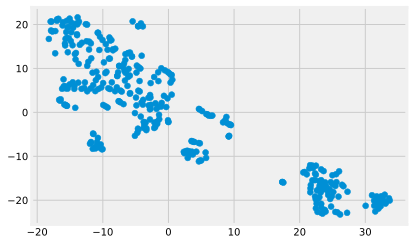

In [110]:
# Построим двумерную диаграмму рассеяния

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

In [111]:
# На диаграмме видно, что данные можно разделить как минимум на две группы

Разобьем данные на 2 кластера

In [112]:
from sklearn.cluster import KMeans

In [113]:
kmeans = KMeans(n_clusters=2)

In [114]:
labels_train = kmeans.fit_predict(X_train_scaled)

In [115]:
pd.value_counts(labels_train)

0    232
1    122
dtype: int64

In [116]:
# Предскажем, к какому классу относится каждый объект на тестовой выборке

labels_test = kmeans.predict(X_test_scaled)

График t-SNE с известными лейблами

Text(25, -7, 'Кластер 1')

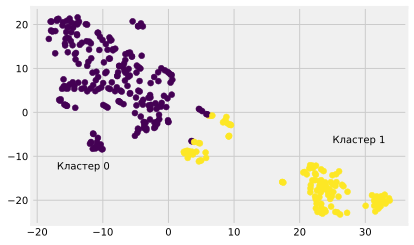

In [117]:
# Снова построим график t-SNE, ну уже с известными значениями кластеров
# Видно, что кластеризация разбила данные на 2 кластера, мы получили практически такое же разбиение

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c = labels_train)
#plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.text(-17, -13, 'Кластер 0')
plt.text(25, -7, 'Кластер 1')

In [118]:
# Для тестовой выборки такой же график построить не сможем, так как у t-SNE нет пока метода transform, который позволил бы
# по построенным на тренировочной выборке модели t-SNE получить компоненты для тестовой выборки
# Зато на тестовой выборке применить те значения кластеров которые получены с помощью модели k-Means, построенной на
# тренировочной выборке

Разберем, почему алгоритм t-SNE четко выделил 2 группы

In [149]:
# Посмотрим на среднее значение цены на недвижимость по всей тренировочной выборке

y_train.mean()

22.595762711864406

In [120]:
# И затем в каждом кластере по отдельности

y_train[labels_train==0].mean()

25.94439655172414

In [121]:
# В кластере 1 цены на недвижимость ниже

y_train[labels_train==1].mean()

16.227868852459018

Text(0.5, 0, 'Цена')

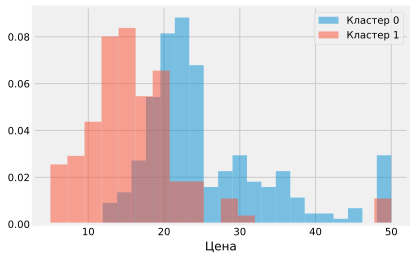

In [122]:
# Построим распределение цен

plt.hist(y_train[labels_train==0], bins = 20, density = True, alpha=0.5)
plt.hist(y_train[labels_train==1], bins = 20, density = True, alpha=0.5)
plt.legend(['Кластер 0', 'Кластер 1'])
plt.xlabel('Цена')

In [123]:
# Самые дешевые объекты недвижимости расположены в кластере 1, причем до этого мы не использовали значение цен ни при
# применении алгоритма t-SNE, ни при кластеризации k-Means

In [124]:
# Если сравним среднее количество комнат в объектах недвиимости в этих двух кластерах, то видим, что они не намного
# отличаются, следовательно это не могло бы повлиять на такое отличающееся распределение цен в кластерах

In [125]:
X_train.loc[labels_train==0, 'RM'].mean()

6.448517241379314

In [126]:
X_train.loc[labels_train==1, 'RM'].mean()

5.909286885245898

In [127]:
# Но если рассмотреть другой признак, отражающий криминальность места, в котором расположена недвижимость, то здесь
# мы видим явные различия

In [128]:
X_train.loc[labels_train==0, 'CRIM'].mean()

0.26798159482758627

In [129]:
# В кластере 1 количество преступлений на душу населения значительно выше

X_train.loc[labels_train==1, 'CRIM'].mean()

9.05679418032787

Text(0.5, 0, 'CRIM (per capita crime rate by town)')

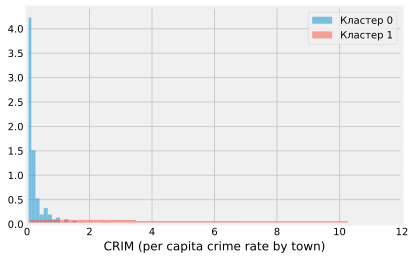

In [130]:
# На графике видно, как распределены значения показателей преступности в кластере 0 и кластере 1
# В кластере 1 больше преступлений

plt.hist(X_train.loc[labels_train==0,'CRIM'], bins = 20, density = True, alpha=0.5)
plt.hist(X_train.loc[labels_train==1,'CRIM'], bins = 20, density = True, alpha=0.5)
plt.xlim(0, 12)
plt.legend(['Кластер 0', 'Кластер 1'])
plt.xlabel('CRIM (per capita crime rate by town)')

Text(0.5, 0, 'NOX\nnitric oxides concentration (parts per 10 million)')

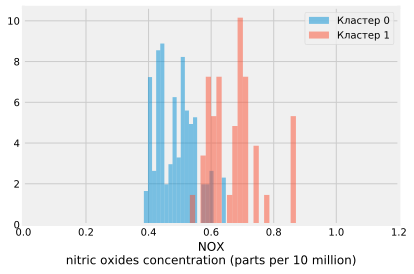

In [131]:
# Просмотрим также концентрацию окислов азота в воздухе

plt.hist(X_train.loc[labels_train==0,'NOX'], bins = 20, density = True, alpha=0.5)
plt.hist(X_train.loc[labels_train==1,'NOX'], bins = 20, density = True, alpha=0.5)
plt.xlim(0, 1.2)
plt.legend(['Кластер 0', 'Кластер 1'])
plt.xlabel('NOX\nnitric oxides concentration (parts per 10 million)')

In [132]:
# Кластер 1 опять отличился в худшую сторону

In [133]:
# У нас есть 2 очень разные группы объектов недвижимости, построим для каждой из них отдельную модель
# но сначала построим одну модель, чтобы было с чем сравнивать

#### Использование информации, полученной с помощью t-SNE в моделях 

Базовая модель предсказания цены на недвижимость (до разделения на кластеры)

In [134]:
from sklearn.linear_model import LinearRegression

In [135]:
lr = LinearRegression()

In [136]:
lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [137]:
y_test_pred = lr.predict(X_test_scaled)

In [138]:
from sklearn.metrics import r2_score

In [139]:
r2_score(y_test, y_test_pred)

0.6508417720329545

Две модели, построенные на объектах из разных кластеров

In [140]:
# 1-я модель - на объектах из Кластера 0

lr.fit(X_train_scaled.loc[labels_train==0, :], y_train[labels_train==0])
y_test_pred_0 = lr.predict(X_test_scaled.loc[labels_test==0, :])
r2_score(y_test[labels_test == 0], y_test_pred_0)

0.8316034335298438

In [141]:
# 2-я модель - на объектах из Кластера 1

lr.fit(X_train_scaled.loc[labels_train==1, :], y_train[labels_train==1])
y_test_pred_1 = lr.predict(X_test_scaled.loc[labels_test==1, :])
r2_score(y_test[labels_test == 1], y_test_pred_1)

0.6458127429551196

In [142]:
# Чтобы определить качество предсказаний моделей, построенны с использованием информации о кластерах, мы должны 
# объединить полученные объекты
# Объединение изветсных правильных ответов по объектам из двух кластеров

y_test_all = np.hstack([y_test[labels_test==0], y_test[labels_test==1]])

In [143]:
# Объединение предсказанных ответов по объектам из двух кластеров

y_test_pred_all = np.hstack([y_test_pred_0, y_test_pred_1])

In [144]:
# R2 по всем объектам тестовой выборки

r2_score(y_test_all, y_test_pred_all)

0.8055877528812476

In [145]:
# Т.е. мы успешно применили информацию, полученную нами с помощью алгоритма t-SNE

In [146]:
y_train

array([20.1, 14.4, 14.9, 10.2, 20.8, 50. , 23.3, 25. , 23.7, 11.9, 23.9,
       20.6, 23.8, 32. ,  8.3, 22.5, 37.2,  8.4, 23.4, 13.1, 17.8, 50. ,
       29.1, 19.4, 11.7, 30.1, 27.5, 26.7, 33.2, 33.1, 17.8, 19.9, 50. ,
       50. , 20. , 22.5, 21. ,  7. ,  8.8, 19.8, 23.1, 23.4, 32.4, 20.1,
       22.4, 42.8, 23.1, 16.1, 22. , 23.6, 10.9, 14. , 29.1, 18.6, 36. ,
       22.6, 17.4, 24.3, 41.3, 24.2, 18.4, 45.4, 21.2, 50. , 27.5, 16.5,
       22.9, 18.6, 20.1, 41.7, 20.2, 24.6, 10.5, 13.6, 35.4, 32.2, 13.4,
       25. , 13.5, 36.2, 26.4, 21.5, 22.5, 23.3, 27.9, 50. , 28.6, 38.7,
       24. , 12.5, 16.1, 17. , 20.5, 18.7, 17.1, 32.7, 19.1, 19.8, 21.2,
       20.6, 16. , 19.5, 19.9, 21.4, 14.6, 12.7, 21.2, 14.2, 35.2, 27.5,
       15.6, 23.1, 14.5, 16.8, 15.7, 17.5, 13.6, 29.9, 11.7, 13.3, 30.1,
       24.1, 25. , 20.9, 20. , 27. , 18.9, 11.8, 30.1, 16.2, 10.9, 18.9,
       20.2, 23.2, 31.7, 21.7, 18. , 15.6, 20.1, 27.1, 21.9, 50. , 20.7,
       16.5, 13.1, 14.8, 30.7, 33. , 20.9, 19.1, 19

In [147]:
type(y_train)

numpy.ndarray